# 图片识别、目标检测、风格迁移

## 目标检测

标准的CNN分类模型，经过CONV卷积层后，Softmax层输出4 x 1向量：

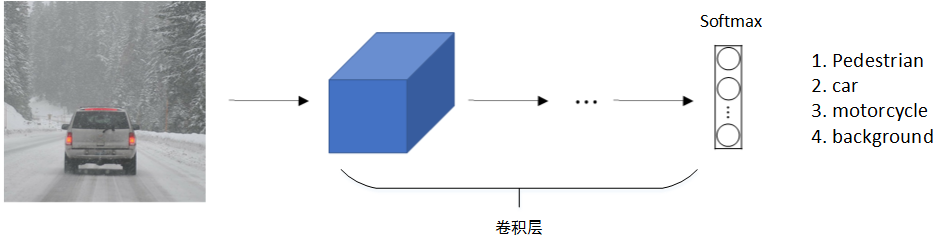

In [1]:
from IPython.display import Image
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "18.png", width=800, height=200)

目标定位与目标检测：原始图片经过CONV卷积层后，Softmax层输出8 x 1向量。除了包含上述一般CNN分类3 x 1向量（class label）之外，还包含了(bx, by)，表示目标中心位置坐标；还包含了bh和bw，表示目标所在矩形区域的高和宽；还包含了Pc，表示矩形区域是目标的概率，数值在0～1之间，且越大概率越大。一般设定图片左上角为原点(0, 0)，右下角为(1, 1)。在模型训练时，bx、by、bh、bw都由人为确定其数值。例如下图中，可得bx=0.5，by=0.7，bh=0.3，bw=0.4。

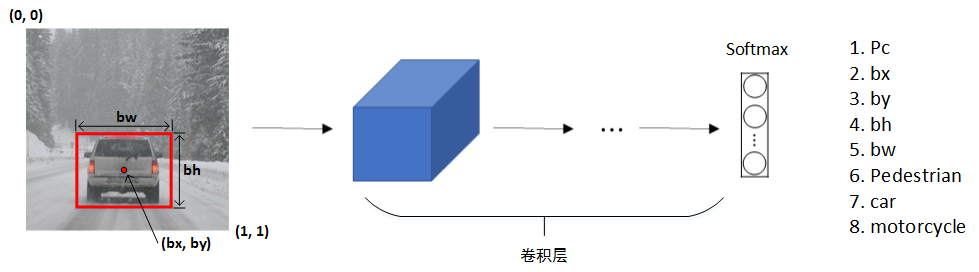

In [2]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "19.png", width=800, height=200)

输出层有两种大致情况：1.Pc=1，检测到有目标，后根据bx,by.bh,bw确定位置，再由c1,c2,c3确定分类。 2.Pc=0,图片中没有目标，判定为纯背景，后面的参数忽略。

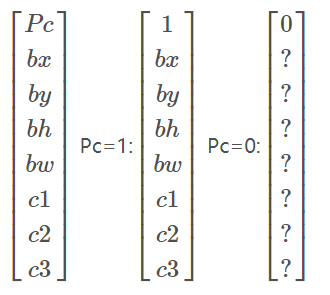

In [3]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "20.png", width=300, height=500)

损失函数的计算(使用平方误差形式)：1.Pc=1时，即y1=1.$L(\hat y,y)=(\hat y_1 - y_1)^2 + (\hat y_2 - y_2)^2 + \cdots + (\hat y_8 - y_8)^2$
2.Pc=0时，即y1=0. $L(\hat y,y)=(\hat y_1 - y_1)^2$

Landmarks Detection(关键点定位)：仅对目标的关键特征点坐标进行定位。

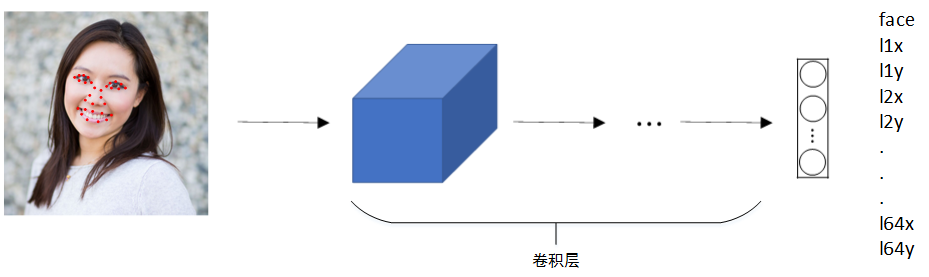

In [4]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "21.png", width=500, height=100)

该图：共检测了64处特征点（x,y），加上是否为脸的标志位，共输出129个值。
此外，检测人体姿势动作也可以的。检测过程中应保证每个点所代表的位置不变。

滑动窗方法---目标检测中的一种简单方法：首先在训练集样本上搜索相应的各种目标图片，尺寸尽量小，尽量包含目标。然后使用这些训练集构建CNN模型。最后，在测试图片上，选择合适的窗口、步长，进行从左到右、从上到下的滑动。对每一个窗口进行判断。

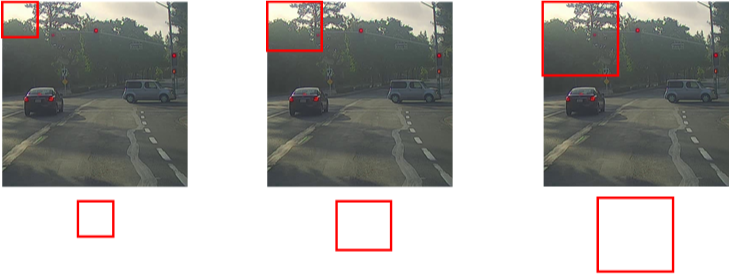

In [5]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "22.png", width=550, height=100)

滑动窗算法的优点：原理简单，且不需要人为选定目标区域；
缺点是：滑动窗的大小和步进长度都需要人为直观设定，滑动窗过小或过大，步进长度过大均会降低目标检测正确率。每次滑动窗区域都要进行一次CNN网络计算，如果滑动窗和步进长度较小，整个目标检测的算法运行时间会很长。

滑动窗的卷积实现：首先，将全连接层变为卷积层：用与上层尺寸一致的滤波器进行卷积即可。再对每个窗口区域重复操作。

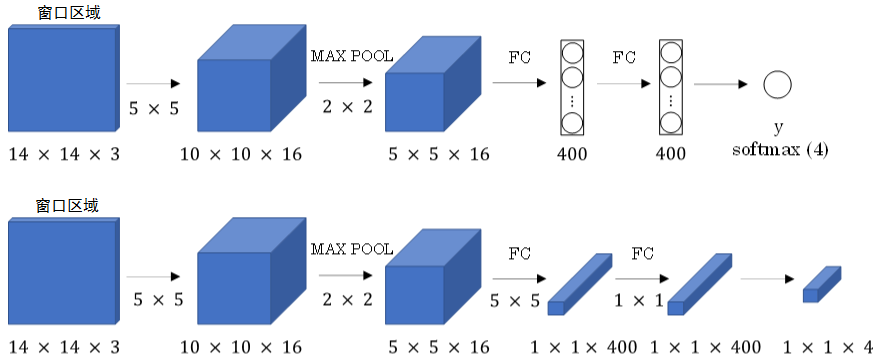

In [6]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "23.png", width=550, height=100)

具体操作：对一张图片做滑动窗实现，最后一个滑动窗对应一个$1X1$的像素点。
卷积实现的优势：利用卷积操作代替滑动窗算法，则不管原始图片有多大，只需要进行一次CNN正向计算，因为其中共享了很多重复计算部分，这大大节约了运算成本。
值得一提的是，窗口步进长度与选择的MAX POOL大小有关。如果需要步进长度为4，只需设置MAX POOL为4 x 4即可。

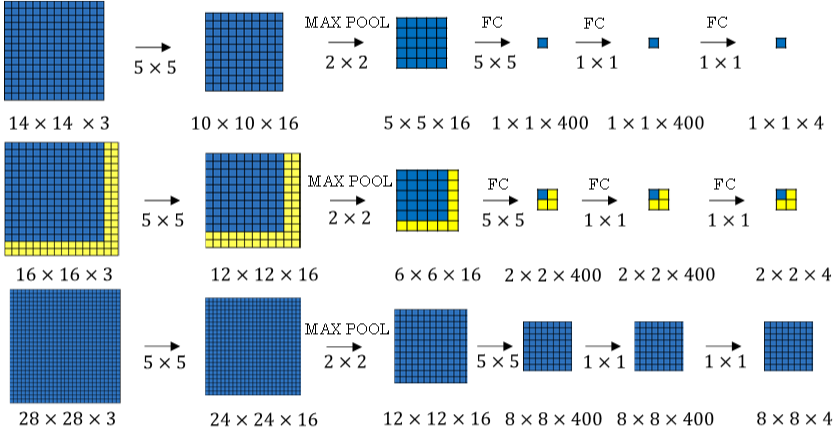

In [7]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "24.png", width=550, height=100)

若滑动窗没有完全涵盖目标：YOLO（You Only Look Once）算法

YOLO：首先将原始图片分割成n x n网格，类似上图构建相应的CNN网络，最后每个输出的小网格包括8个元素【Pc,bx,by,bh,bw,x1,c2,c3】

如果目标中心坐标(bx,by)不在当前网格内，则当前网格Pc=0；相反，则当前网格Pc=1。在有目标的网格中，bx,by,bh,bw限定了目标区域，网格左上角坐标设定为(0, 0)，右下角坐标设定为(1, 1)，(bx,by)范围限定在[0,1]之间，但是bh,bw可以大于1。因为目标可能超出该网格，横跨多个区域。目标占几个网格没有关系，目标中心坐标必然在一个网格之内。我们的目标是每个中心都在一个网格中，每个网格最多含有1个目标中心。

交并比（IoU）：交集与并集之比，可以表示任意两块区域的接近程度，可以用来评价目标检测区域的准确性。

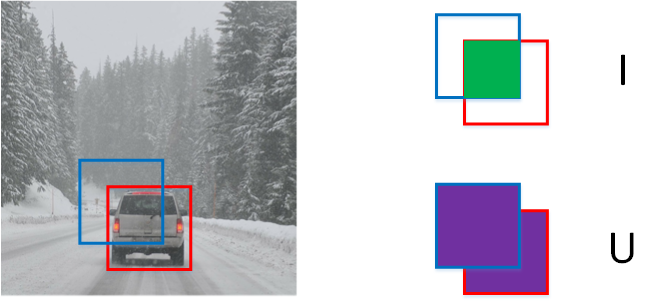

In [8]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "25.png", width=550, height=100)

红色方框为真实目标区域，蓝色方框为检测目标区域。两块区域的交集为绿色部分，并集为紫色部分。蓝色方框与红色方框的接近程度可以用IoU比值来定义： $IoU = \frac IU$  由定义可知，IoU值介于0～1之间，且越接近1表示两块区域越接近。一般0.5为阈值。

Non-max Suppression（非极大值抑制算法）: 多个网格检测到同一目标，找出最能代表的网格，保证同一目标只有一个网格与之对应。先选取Pc最大值对应的网格和区域，然后计算该区域与所有其它区域的IoU，剔除掉IoU大于阈值（例如0.5）的所有网格及区域。

步骤：
1. 剔除Pc值小于某阈值（例如0.6）的所有网格；
2. 选取Pc值最大的网格，利用IoU，摒弃与该网格交叠较大的网格；
3. 对剩下的网格，重复步骤2。

Anchor Boxes : 前面都是一个网格至多只能有一个目标，针对多目标重叠的情况。
若图片上有 n 个物体重叠，则设置 n 种框来检测。每一种检测一类事物、并行实现。

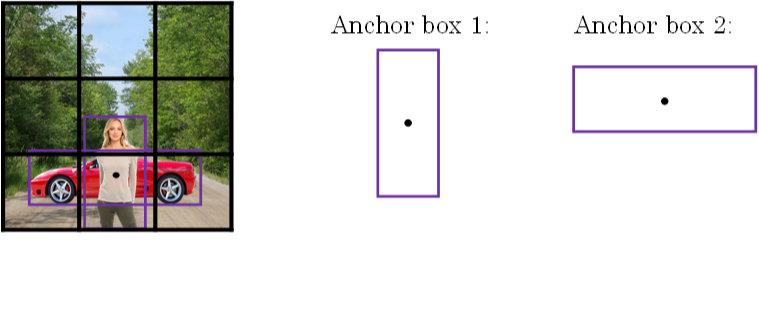

In [9]:
libo="C:/Users/libo/Desktop/machine learning/卷积神经网络/CNN图片/"
Image(filename = libo + "26.png", width=550, height=100)

Anchor Boxes形状的选择可以通过人为选取，也可以使用其他机器学习算法，例如k聚类算法对待检测的所有目标进行形状分类，选择主要形状作为Anchor Boxes。

YOLO算法：
1.采用合适的 Ancher Boxes。
2.去掉低可能的预测值。
3.进行非极大值抑制。

Region Proposals：避免对无用区域的扫描，提高处理速度。